In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os.path as path
import wget
import os

import corner

import scipy.optimize as spo

In [2]:
# Descargamos data
if not path.exists('Data'):
    os.mkdir('Data')

!rm Data/*

file = 'Data/HiggsFitting.csv'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/HiggsFitting.csv'
if not path.exists(file):
    Path_ = wget.download(url,file)
    print('File loaded')
else:
    Path_ = file

100% [..............................................................................] 97796 / 97796File loaded


In [3]:
def GetHisto(Data,bines):
    
    h, bins = np.histogram(Data,bins=bines)
    w = np.diff(bins)   # Ancho de clase
    m = bins[:-1] + 0.5*w[0] # Marca de clase
    
    hnorm = h/(np.sum(h)*w) # normalizando histo
    
    return h,hnorm,m,w

In [17]:
Data = pd.read_csv(Path_)
#Data
X = Data.Higgs

In [6]:
xbins = np.linspace(0,10,40)
HSignalBkg,HNSignalBkg,m,w = GetHisto(Data,xbins) 

<BarContainer object of 39 artists>

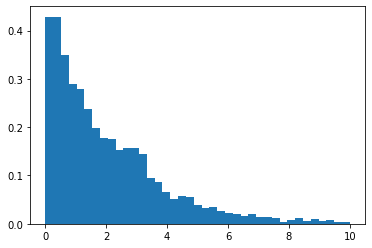

In [7]:
plt.bar(m,HNSignalBkg,width=w)

In [20]:
def Gaus(x,mu=0,sigma=1):
    return np.exp(  - 0.5*(x-mu)**2/sigma**2 )/np.sqrt(2*np.pi*sigma**2)
def Exp(x,alpha=1):
    return np.exp( -x/alpha )/alpha

In [21]:
def Likelihood(p,x,Null=False):
    
    if Null:
        alpha = p
        L = Exp(x,alpha)
    else:
        A, mu, sigma, alpha = p
        L = A*Gaus(x,mu,sigma) + (1-A)*Exp(x,alpha)
        
    return L

In [22]:
def JointLikelihood(p,x,Null=False):
    return -np.sum( np.log(Likelihood(p,x,Null)) )

In [25]:
nll = lambda *p: JointLikelihood(*p)
p0 = np.array([0.1,3,1,3])
nll(p0,X,False)

9296.11364933298

In [26]:
result = spo.minimize( nll, p0, args=(X,False), method='Nelder-Mead' )

In [36]:
param = result.x
param

array([0.03389207, 3.02600689, 0.23060575, 2.01712934])

In [31]:
p0 = np.array([1])
result1 = spo.minimize( nll, p0, args=(X,True), method='Nelder-Mead' )

In [32]:
param1 = result1.x

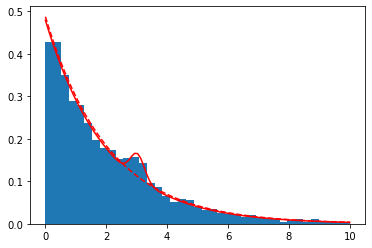

In [33]:
x = np.linspace(xbins[0],xbins[-1],100)
plt.bar(m,HNSignalBkg,width=w)
plt.plot(x,Likelihood(param,x,False),color='r')
plt.plot(x,Likelihood(param1,x,True),ls='--',color='r')

In [34]:
Lb = nll(param1,X,True)
Lsb = nll(param,X)
print(Lsb,Lb)

8909.758201040611 8936.190974310479


In [35]:
np.sqrt(-2*(Lsb-Lb))

7.2708697237493585